In [ ]:
using LimberJack
using ForwardDiff
#using PyPlot
using Statistics

In [4]:
using YAML
using PythonCall
sacc = pyimport("sacc");

In [5]:
sacc_path = "../data/FD/cls_FD_covG.fits"
yaml_path = "../data/DESY1/gcgc_gcwl_wlwl.yml"
sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

LoadError: UndefVarError: pyconvert not defined

In [7]:
sacc_file

Python Sacc: <sacc.sacc.Sacc object at 0x7efb759eb9d0>

In [6]:
meta, files = make_data(sacc_file, yaml_file)

LoadError: UndefVarError: pyconvert not defined

In [2]:
#ks = npzread("../emulator/files.npz")["training_karr"]

lks = LinRange(-4, log(7), 200)
ks = exp.(lks);

In [3]:
function lin_BBKS(Ωm)
    cosmo = Cosmology(Ωm, 0.05, 0.67, 0.96, 0.81;
                      tk_mode="BBKS", Pk_mode="linear")
    pk = lin_Pk(cosmo, ks, 0.)
    return pk
end

function lin_EisHu(Ωm)
    cosmo = Cosmology(Ωm, 0.05, 0.67, 0.96, 0.81;
                      tk_mode="EisHu", Pk_mode="linear")
    pk = lin_Pk(cosmo, ks, 0.)
    return pk
end

function lin_emul(Ωm)
    cosmo = Cosmology(Ωm, 0.04, 0.75, 1.0, 0.81;
                      tk_mode="emulator", Pk_mode="linear")
    pk = lin_Pk(cosmo, ks, 0.)
    return pk
end

Ωm0 = 0.25
dΩm = 0.01
ddΩm = 0.015

lin_BBKS_autodiff = ForwardDiff.derivative(lin_BBKS, Ωm0)
lin_EisHu_autodiff = ForwardDiff.derivative(lin_EisHu, Ωm0)
lin_emul_autodiff = ForwardDiff.derivative(lin_emul, Ωm0)
lin_BBKS_num = (lin_BBKS(Ωm0+dΩm)-lin_BBKS(Ωm0-dΩm))/(2dΩm)
lin_EisHu_num = (lin_EisHu(Ωm0+dΩm)-lin_EisHu(Ωm0-dΩm))/(2dΩm)
lin_emul_num = (lin_emul(Ωm0+ddΩm)-lin_emul(Ωm0-ddΩm))/(2ddΩm);

In [4]:
#lin_BBKS_autodiff ./= lin_BBKS(Ωm0)
#lin_EisHu_autodiff ./= lin_EisHu(Ωm0)
#lin_emul_autodiff ./= lin_emul(Ωm0)
#lin_BBKS_num ./= lin_BBKS(Ωm0)
#lin_EisHu_num ./= lin_EisHu(Ωm0)
#lin_emul_num ./= lin_emul(Ωm0)

e = 0
lin_BBKS_autodiff = abs.(lin_BBKS_autodiff) .+ e
lin_EisHu_autodiff = abs.(lin_EisHu_autodiff) .+ e
lin_emul_autodiff = abs.(lin_emul_autodiff) .+ e
lin_BBKS_num = abs.(lin_BBKS_num) .+ e
lin_EisHu_num = abs.(lin_EisHu_num) .+ e
lin_emul_num = abs.(lin_emul_num); .+ e;

In [5]:
function nonlin_BBKS(Ωm)
    cosmo = Cosmology(Ωm, 0.05, 0.67, 0.96, 0.81;
                      tk_mode="BBKS", Pk_mode="Halofit")
    pk = nonlin_Pk(cosmo, ks, 0.)
    return pk
end

function nonlin_EisHu(Ωm)
    cosmo = Cosmology(Ωm, 0.05, 0.67, 0.96, 0.81;
                      tk_mode="EisHu", Pk_mode="Halofit")
    pk = nonlin_Pk(cosmo, ks, 0.)
    return pk
end

function nonlin_emul(Ωm)
    cosmo = Cosmology(Ωm, 0.04, 0.75, 1.0, 0.81;
                      tk_mode="emulator", Pk_mode="Halofit")
    pk = nonlin_Pk(cosmo, ks, 0.)
    return pk
end

Ωm0 = 0.25
dΩm = 0.01
ddΩm = 0.02

nonlin_BBKS_autodiff = ForwardDiff.derivative(nonlin_BBKS, Ωm0)
nonlin_EisHu_autodiff = ForwardDiff.derivative(nonlin_EisHu, Ωm0)
nonlin_emul_autodiff = ForwardDiff.derivative(nonlin_emul, Ωm0)
nonlin_BBKS_num = (nonlin_BBKS(Ωm0+dΩm)-nonlin_BBKS(Ωm0-dΩm))/(2dΩm)
nonlin_EisHu_num = (nonlin_EisHu(Ωm0+dΩm)-nonlin_EisHu(Ωm0-dΩm))/(2dΩm)
nonlin_emul_num = (nonlin_emul(Ωm0+ddΩm)-nonlin_emul(Ωm0-ddΩm))/(2ddΩm);

In [6]:
#nonlin_BBKS_autodiff ./= nonlin_BBKS(Ωm0)
#nonlin_EisHu_autodiff ./= nonlin_EisHu(Ωm0)
#nonlin_emul_autodiff ./= nonlin_emul(Ωm0)
#nonlin_BBKS_num ./= nonlin_BBKS(Ωm0)
#nonlin_EisHu_num ./= nonlin_EisHu(Ωm0)
#nonlin_emul_num ./= nonlin_emul(Ωm0)

nonlin_BBKS_autodiff = abs.(nonlin_BBKS_autodiff) .+ e
nonlin_EisHu_autodiff = abs.(nonlin_EisHu_autodiff) .+ e
nonlin_emul_autodiff = abs.(nonlin_emul_autodiff) .+ e
nonlin_BBKS_num = abs.(nonlin_BBKS_num) .+ e
nonlin_EisHu_num = abs.(nonlin_EisHu_num) .+ e
nonlin_emul_num = abs.(nonlin_emul_num); .+ e;

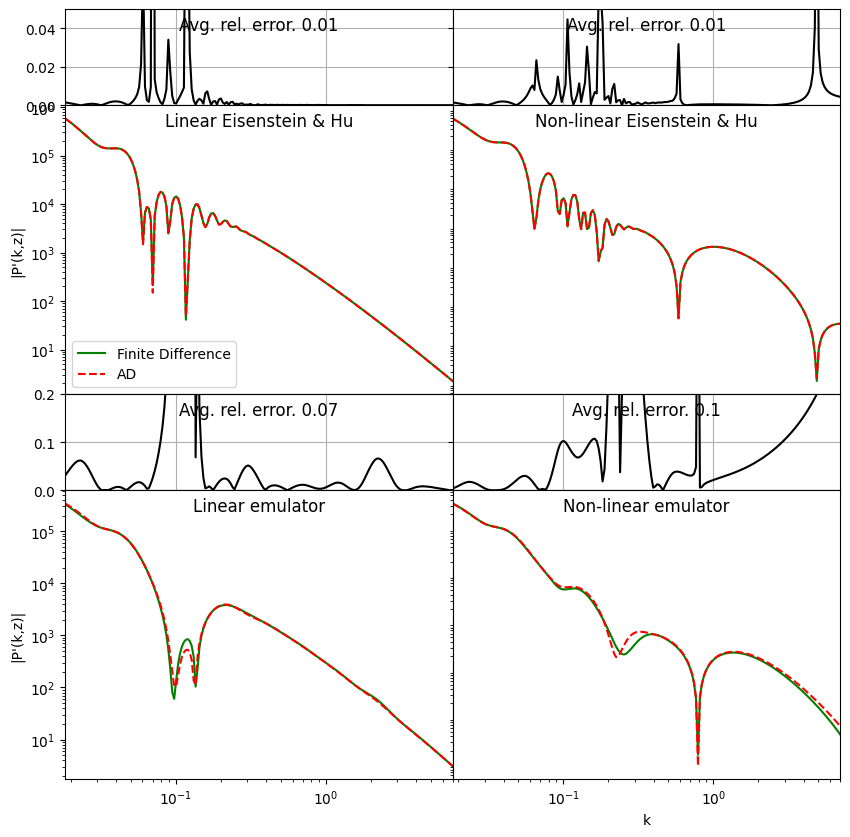

In [8]:
fig, axis = plt.subplots(4, 2, figsize=(10,10), gridspec_kw= Dict("height_ratios" => [1, 3, 1, 3]))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

comp_lin_EisHu =  abs.(lin_EisHu_num./lin_EisHu_autodiff .-1)
axis[1,1].set_title(string("Avg. rel. error.", " ",
                            round(mean(comp_lin_EisHu), digits=2)), y=0.7)
axis[1,1].plot(ks, comp_lin_EisHu , "k-")
axis[1,1].set_ylim(0, 0.05)
axis[1,1].set_xscale("log")
axis[1,1].xaxis.set_ticklabels([])
axis[1,1].grid(true)
axis[1,1].set_xlim([ks[1], ks[end]])

axis[2,1].plot(ks, lin_EisHu_num, "g-", label="Finite Difference")
axis[2,1].plot(ks, lin_EisHu_autodiff, "r--", label="AD")
axis[2,1].legend(loc=3)
axis[2,1].set_ylabel("|P'(k,z)|")
axis[2,1].xaxis.set_ticklabels([])
axis[2,1].set_title("Linear Eisenstein & Hu", y=0.9)
axis[2,1].set_xscale("log")
axis[2,1].set_yscale("log")
axis[2,1].set_xlim([ks[1], ks[end]])

comp_lin_emul = abs.(lin_emul_num./lin_emul_autodiff.-1)
axis[3,1].set_title(string("Avg. rel. error.", " ",
                            round(mean(comp_lin_emul), digits=2)), y=0.7)
axis[3,1].plot(ks, comp_lin_emul, "k-")
axis[3,1].set_ylim(0, 0.2)
axis[3,1].grid(true)
axis[3,1].set_xscale("log")
#axis[3,1].yaxis.set_ticklabels([])
axis[3,1].set_xlim([ks[1], ks[end]])

axis[4,1].plot(ks, lin_emul_num, "g-", label="Finite Difference")
axis[4,1].plot(ks, lin_emul_autodiff, "r--", label="AD")
axis[4,1].set_title("Linear emulator", y=0.9)
axis[4,1].set_xscale("log")
axis[4,1].set_ylabel("|P'(k,z)|")
axis[4,1].set_yscale("log")
axis[4,1].set_xlim([ks[1], ks[end]])

comp_nonlin_EisHu = abs.(nonlin_EisHu_num./nonlin_EisHu_autodiff.-1)
axis[1,2].set_title(string("Avg. rel. error.", " ",
                            round(mean(comp_nonlin_EisHu), digits=2)), y=0.7)
axis[1,2].plot(ks, comp_nonlin_EisHu, "k-")
axis[1,2].set_ylim(0, 0.05)
axis[1,2].xaxis.set_ticklabels([])
axis[1,2].yaxis.set_ticklabels([])
axis[1,2].set_xscale("log")
axis[1,2].grid(true)
axis[1,2].set_xlim([ks[1], ks[end]])

axis[2,2].plot(ks, nonlin_EisHu_num, "g-", label="Finite Difference")
axis[2,2].plot(ks, nonlin_EisHu_autodiff, "r--", label="AD")
axis[2,2].set_title("Non-linear Eisenstein & Hu", y=0.9)
axis[2,2].set_xscale("log")
axis[2,2].set_yscale("log")
axis[2,2].set_yticks([])
axis[2,2].set_xlim([ks[1], ks[end]])

comp_nonlin_emul = abs.(nonlin_emul_num./nonlin_emul_autodiff.-1)
axis[3,2].set_title(string("Avg. rel. error.", " ",
                           round(mean(comp_nonlin_emul), digits=2)), y=0.7)
axis[3,2].plot(ks, comp_nonlin_emul, "k-")
axis[3,2].set_ylim(0, 0.2)
axis[3,2].grid(true)
axis[3,2].yaxis.set_ticklabels([])
axis[3,2].set_xscale("log")
axis[3,2].set_xlim([ks[1], ks[end]])

axis[4,2].plot(ks, nonlin_emul_num, "g-", label="Finite Difference")
axis[4,2].plot(ks, nonlin_emul_autodiff, "r--", label="AD")
axis[4,2].set_xlabel("k")
axis[4,2].set_title("Non-linear emulator", y=0.9)
axis[4,2].set_xscale("log")
axis[4,2].set_yscale("log")
axis[4,2].set_yticks([])
axis[4,2].set_xlim([ks[1], ks[end]]);

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/diff_Pk_acc.pdf", bbox_inches="tight")